# 3.Longest Substring Without Repeating Characters (Done / Poor score)

Characters of the resulting output must be distinct

6 / 6

In [ ]:
class Solution(object):
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """

        hash = {}
        score = 0
        ans = 0

        for pivot in range(len(s)): # this loop has too many redundant computations - should be modified
          for idx in range(pivot, len(s)):
            
            if s[idx] in hash:
              
              break
            hash[s[idx]] = 'O'
            score += 1
          hash = {} # reset the hash   

          if score > ans : # if the result of the new computation is larger than the previous score
            ans = score
            score = 0
          else: # if not
            score = 0  

        return ans


        

Another trial

Let's say the given string is "pwwkew". We let each letter of the string be called "pivot". <br>
With each pivot fixed, run the for loop within the range (pivot, len(s)) so that do not redundant computations.

Newly appeearing letters are stroed in pre-defiend hash table one by one. When collision (= the letter we are looking at is not a new one) happens, we call each collision alpha and collision beta. By doing further computation after shifting the pivot into (collision alpha + 1), we can reduce the nuisance computations

5 / 20

In [ ]:
class Solution(object):
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        hash = {}
        ans = 0
        score = 0
        pivot = 0
        
        if s == "":
          return ans

        while pivot != 'end':

          #print(f"now pivot is {pivot} with reset score {score}")
          for idx in range(pivot, len(s)):

            
            if s[idx] in hash: # if collide
              
              #print(f"collided idx is {idx}")

              pivot = hash[s[idx]] + 1 # shift the pivot
              if score > ans: # change the answer under condition

                #print(f"refreshed answer is {score}")
                ans = score
                
              score = 0
              hash = {}
              break
            
            hash[s[idx]] = idx
            score += 1

            if idx == len(s) - 1:
              pivot = 'end'
              if score > ans:
                ans = score
                score = 0

            
            
            

        return ans


        

In [ ]:
s = "abcdefabc"
R = Solution().lengthOfLongestSubstring(s)
print(R)

6


The last trial - not using 'score' variable through defining a function and immediately compare its return with 'ans' variable

Leetcode best solution

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s):
        start = maxLength = 0
        usedChar = {}
        
        for i in range(len(s)):
            if s[i] in usedChar and start <= usedChar[s[i]]:
                start = usedChar[s[i]] + 1
            else:
                maxLength = max(maxLength, i - start + 1)

            usedChar[s[i]] = i

        return maxLength

# 5. Longest Palindromic Substring

In [ ]:
class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        

In [ ]:
s = "babadabas"



# 6.Zigzag Conversion (Done / too long but decent score)

86 / 31

In [ ]:
class Solution(object):
    def convert(self, s, numRows):
      ans = ""
      cnt = 0

      if numRows == 1:
        return s
      else:
        while cnt != numRows: # Terminate the loop when the length of rearranged string has the same lenght of given string.
        
          interval =  2 * (numRows - 1)
          if (cnt == 0) or (cnt == (numRows - 1)):
            for idx in list(range(cnt, len(s), interval)):
              ans += s[idx]
            #print(f"Operating on {cnt + 1}th row, current answer is {ans}")
            cnt += 1

          else:
            left, right, idx = interval - (2 * cnt), 2 * cnt, cnt
            if idx < len(s):
              ans += s[idx]
            else:
              break
            while True : # modify later
              if idx + left < len(s) :
                ans += s[idx + left]
                idx += left
              else:
                break

              if idx + right < len(s) :  
                ans += s[idx + right]
                idx += right
              else:
                break

            #print(f"Operating on {cnt + 1}th row, current answer is {ans}")
            cnt += 1
        return ans
        

In [ ]:
s = ".Aza"
numRows = 2

obj = Solution()
obj.convert(s, numRows)

'.zAa'

# 15.3Sum (runtime exceeded)

In [ ]:
target = 0
nums = [-1,0,1,2,-1,-4]
indices = [i for i in range(len(nums))]
hash = {}
for idx in indices:
  if nums[idx] in hash:
    hash[nums[idx]].append(idx)

  else:
    hash[nums[idx]] = [idx]


In [ ]:
hash

{-4: [5], -1: [0, 4], 0: [1], 1: [2], 2: [3]}

In [ ]:
container = []
for i in range(len(nums)):
  complement = target - nums[i]
  myrange = list(range(i + 1, len(nums))) # modify ! (myrange should start from i)

  for j in myrange:
    complement2 = complement - nums[j]
    myrange2 = list(range(j + 1, len(nums)))

    if (complement2 in hash):
      
      for k in hash[complement2] : 
        if k in myrange2 :
          
          if sorted([nums[i], nums[j], nums[k]]) not in container:
            print(f"i : {i}, j : {j}, k : {k}")
            container.append(sorted([nums[i], nums[j], nums[k]]))
            break
          else:
            pass
        else :
          pass
      

container



i : 0, j : 1, k : 2
i : 0, j : 3, k : 4


[[-1, 0, 1], [-1, -1, 2]]

Leetcode Submission

In [ ]:
nums = [82597,-9243,62390,83030,-97960,-26521,-61011,83390,-38677,12333,75987,46091,83794,19355,-71037,-6242,-28801,324,1202,-90885,-2989,-95597,-34333,35528,5680,89093,-90606,50360,-29393,-27012,53313,65213,99818,-82405,-41661,-3333,-51952,72135,-1523,26377,74685,96992,92263,15929,5467,-99555,-43348,-41689,-60383,-3990,32165,65265,-72973,-58372,12741,-48568,-46596,72419,-1859,34153,62937,81310,-61823,-96770,-54944,8845,-91184,24208,-29078,31495,65258,14198,85395,70506,-40908,56740,-12228,-40072,32429,93001,68445,-73927,25731,-91859,-24150,10093,-60271,-81683,-18126,51055,48189,-6468,25057,81194,-58628,74042,66158,-14452,-49851,-43667,11092,39189,-17025,-79173,13606,83172,92647,-59741,19343,-26644,-57607,82908,-20655,1637,80060,98994,39331,-31274,-61523,91225,-72953,13211,-75116,-98421,-41571,-69074,99587,39345,42151,-2460,98236,15690,-52507,-95803,-48935,-46492,-45606,-79254,-99851,52533,73486,39948,-7240,71815,-585,-96252,90990,-93815,93340,-71848,58733,-14859,-83082,-75794,-82082,-24871,-15206,91207,-56469,-93618,67131,-8682,75719,87429,-98757,-7535,-24890,-94160,85003,33928,75538,97456,-66424,-60074,-8527,-28697,-22308,2246,-70134,-82319,-10184,87081,-34949,-28645,-47352,-83966,-60418,-15293,-53067,-25921,55172,75064,95859,48049,34311,-86931,-38586,33686,-36714,96922,76713,-22165,-80585,-34503,-44516,39217,-28457,47227,-94036,43457,24626,-87359,26898,-70819,30528,-32397,-69486,84912,-1187,-98986,-32958,4280,-79129,-65604,9344,58964,50584,71128,-55480,24986,15086,-62360,-42977,-49482,-77256,-36895,-74818,20,3063,-49426,28152,-97329,6086,86035,-88743,35241,44249,19927,-10660,89404,24179,-26621,-6511,57745,-28750,96340,-97160,-97822,-49979,52307,79462,94273,-24808,77104,9255,-83057,77655,21361,55956,-9096,48599,-40490,-55107,2689,29608,20497,66834,-34678,23553,-81400,-66630,-96321,-34499,-12957,-20564,25610,-4322,-58462,20801,53700,71527,24669,-54534,57879,-3221,33636,3900,97832,-27688,-98715,5992,24520,-55401,-57613,-69926,57377,-77610,20123,52174,860,60429,-91994,-62403,-6218,-90610,-37263,-15052,62069,-96465,44254,89892,-3406,19121,-41842,-87783,-64125,-56120,73904,-22797,-58118,-4866,5356,75318,46119,21276,-19246,-9241,-97425,57333,-15802,93149,25689,-5532,95716,39209,-87672,-29470,-16324,-15331,27632,-39454,56530,-16000,29853,46475,78242,-46602,83192,-73440,-15816,50964,-36601,89758,38375,-40007,-36675,-94030,67576,46811,-64919,45595,76530,40398,35845,41791,67697,-30439,-82944,63115,33447,-36046,-50122,-34789,43003,-78947,-38763,-89210,32756,-20389,-31358,-90526,-81607,88741,86643,98422,47389,-75189,13091,95993,-15501,94260,-25584,-1483,-67261,-70753,25160,89614,-90620,-48542,83889,-12388,-9642,-37043,-67663,28794,-8801,13621,12241,55379,84290,21692,-95906,-85617,-17341,-63767,80183,-4942,-51478,30997,-13658,8838,17452,-82869,-39897,68449,31964,98158,-49489,62283,-62209,-92792,-59342,55146,-38533,20496,62667,62593,36095,-12470,5453,-50451,74716,-17902,3302,-16760,-71642,-34819,96459,-72860,21638,47342,-69897,-40180,44466,76496,84659,13848,-91600,-90887,-63742,-2156,-84981,-99280,94326,-33854,92029,-50811,98711,-36459,-75555,79110,-88164,-97397,-84217,97457,64387,30513,-53190,-83215,252,2344,-27177,-92945,-89010,82662,-11670,86069,53417,42702,97082,3695,-14530,-46334,17910,77999,28009,-12374,15498,-46941,97088,-35030,95040,92095,-59469,-24761,46491,67357,-66658,37446,-65130,-50416,99197,30925,27308,54122,-44719,12582,-99525,-38446,-69050,-22352,94757,-56062,33684,-40199,-46399,96842,-50881,-22380,-65021,40582,53623,-76034,77018,-97074,-84838,-22953,-74205,79715,-33920,-35794,-91369,73421,-82492,63680,-14915,-33295,37145,76852,-69442,60125,-74166,74308,-1900,-30195,-16267,-60781,-27760,5852,38917,25742,-3765,49097,-63541,98612,-92865,-30248,9612,-8798,53262,95781,-42278,-36529,7252,-27394,-5021,59178,80934,-48480,-75131,-54439,-19145,-48140,98457,-6601,-51616,-89730,78028,32083,-48904,16822,-81153,-8832,48720,-80728,-45133,-86647,-4259,-40453,2590,28613,50523,-4105,-27790,-74579,-17223,63721,33489,-47921,97628,-97691,-14782,-65644,18008,-93651,-71266,80990,-76732,-47104,35368,28632,59818,-86269,-89753,34557,-92230,-5933,-3487,-73557,-13174,-43981,-43630,-55171,30254,-83710,-99583,-13500,71787,5017,-25117,-78586,86941,-3251,-23867,-36315,75973,86272,-45575,77462,-98836,-10859,70168,-32971,-38739,-12761,93410,14014,-30706,-77356,-85965,-62316,63918,-59914,-64088,1591,-10957,38004,15129,-83602,-51791,34381,-89382,-26056,8942,5465,71458,-73805,-87445,-19921,-80784,69150,-34168,28301,-68955,18041,6059,82342,9947,39795,44047,-57313,48569,81936,-2863,-80932,32976,-86454,-84207,33033,32867,9104,-16580,-25727,80157,-70169,53741,86522,84651,68480,84018,61932,7332,-61322,-69663,76370,41206,12326,-34689,17016,82975,-23386,39417,72793,44774,-96259,3213,79952,29265,-61492,-49337,14162,65886,3342,-41622,-62659,-90402,-24751,88511,54739,-21383,-40161,-96610,-24944,-602,-76842,-21856,69964,43994,-15121,-85530,12718,13170,-13547,69222,62417,-75305,-81446,-38786,-52075,-23110,97681,-82800,-53178,11474,35857,94197,-58148,-23689,32506,92154,-64536,-73930,-77138,97446,-83459,70963,22452,68472,-3728,-25059,-49405,95129,-6167,12808,99918,30113,-12641,-26665,86362,-33505,50661,26714,33701,89012,-91540,40517,-12716,-57185,-87230,29914,-59560,13200,-72723,58272,23913,-45586,-96593,-26265,-2141,31087,81399,92511,-34049,20577,2803,26003,8940,42117,40887,-82715,38269,40969,-50022,72088,21291,-67280,-16523,90535,18669,94342,-39568,-88080,-99486,-20716,23108,-28037,63342,36863,-29420,-44016,75135,73415,16059,-4899,86893,43136,-7041,33483,-67612,25327,40830,6184,61805,4247,81119,-22854,-26104,-63466,63093,-63685,60369,51023,51644,-16350,74438,-83514,99083,10079,-58451,-79621,48471,67131,-86940,99093,11855,-22272,-67683,-44371,9541,18123,37766,-70922,80385,-57513,-76021,-47890,36154,72935,84387,-92681,-88303,-7810,59902,-90,-64704,-28396,-66403,8860,13343,33882,85680,7228,28160,-14003,54369,-58893,92606,-63492,-10101,64714,58486,29948,-44679,-22763,10151,-56695,4031,-18242,-36232,86168,-14263,9883,47124,47271,92761,-24958,-73263,-79661,-69147,-18874,29546,-92588,-85771,26451,-86650,-43306,-59094,-47492,-34821,-91763,-47670,33537,22843,67417,-759,92159,63075,94065,-26988,55276,65903,30414,-67129,-99508,-83092,-91493,-50426,14349,-83216,-76090,32742,-5306,-93310,-60750,-60620,-45484,-21108,-58341,-28048,-52803,69735,78906,81649,32565,-86804,-83202,-65688,-1760,89707,93322,-72750,84134,71900,-37720,19450,-78018,22001,-23604,26276,-21498,65892,-72117,-89834,-23867,55817,-77963,42518,93123,-83916,63260,-2243,-97108,85442,-36775,17984,-58810,99664,-19082,93075,-69329,87061,79713,16296,70996,13483,-74582,49900,-27669,-40562,1209,-20572,34660,83193,75579,7344,64925,88361,60969,3114,44611,-27445,53049,-16085,-92851,-53306,13859,-33532,86622,-75666,-18159,-98256,51875,-42251,-27977,-18080,23772,38160,41779,9147,94175,99905,-85755,62535,-88412,-52038,-68171,93255,-44684,-11242,-104,31796,62346,-54931,-55790,-70032,46221,56541,-91947,90592,93503,4071,20646,4856,-63598,15396,-50708,32138,-85164,38528,-89959,53852,57915,-42421,-88916,-75072,67030,-29066,49542,-71591,61708,-53985,-43051,28483,46991,-83216,80991,-46254,-48716,39356,-8270,-47763,-34410,874,-1186,-7049,28846,11276,21960,-13304,-11433,-4913,55754,79616,70423,-27523,64803,49277,14906,-97401,-92390,91075,70736,21971,-3303,55333,-93996,76538,54603,-75899,98801,46887,35041,48302,-52318,55439,24574,14079,-24889,83440,14961,34312,-89260,-22293,-81271,-2586,-71059,-10640,-93095,-5453,-70041,66543,74012,-11662,-52477,-37597,-70919,92971,-17452,-67306,-80418,7225,-89296,24296,86547,37154,-10696,74436,-63959,58860,33590,-88925,-97814,-83664,85484,-8385,-50879,57729,-74728,-87852,-15524,-91120,22062,28134,80917,32026,49707,-54252,-44319,-35139,13777,44660,85274,25043,58781,-89035,-76274,6364,-63625,72855,43242,-35033,12820,-27460,77372,-47578,-61162,-70758,-1343,-4159,64935,56024,-2151,43770,19758,-30186,-86040,24666,-62332,-67542,73180,-25821,-27826,-45504,-36858,-12041,20017,-24066,-56625,-52097,-47239,-90694,8959,7712,-14258,-5860,55349,61808,-4423,-93703,64681,-98641,-25222,46999,-83831,-54714,19997,-68477,66073,51801,-66491,52061,-52866,79907,-39736,-68331,68937,91464,98892,910,93501,31295,-85873,27036,-57340,50412,21,-2445,29471,71317,82093,-94823,-54458,-97410,39560,-7628,66452,39701,54029,37906,46773,58296,60370,-61090,85501,-86874,71443,-72702,-72047,14848,34102,77975,-66294,-36576,31349,52493,-70833,-80287,94435,39745,-98291,84524,-18942,10236,93448,50846,94023,-6939,47999,14740,30165,81048,84935,-19177,-13594,32289,62628,-90612,-542,-66627,64255,71199,-83841,-82943,-73885,8623,-67214,-9474,-35249,62254,-14087,-90969,21515,-83303,94377,-91619,19956,-98810,96727,-91939,29119,-85473,-82153,-69008,44850,74299,-76459,-86464,8315,-49912,-28665,59052,-69708,76024,-92738,50098,18683,-91438,18096,-19335,35659,91826,15779,-73070,67873,-12458,-71440,-46721,54856,97212,-81875,35805,36952,68498,81627,-34231,81712,27100,-9741,-82612,18766,-36392,2759,41728,69743,26825,48355,-17790,17165,56558,3295,-24375,55669,-16109,24079,73414,48990,-11931,-78214,90745,19878,35673,-15317,-89086,94675,-92513,88410,-93248,-19475,-74041,-19165,32329,-26266,-46828,-18747,45328,8990,-78219,-25874,-74801,-44956,-54577,-29756,-99822,-35731,-18348,-68915,-83518,-53451,95471,-2954,-13706,-8763,-21642,-37210,16814,-60070,-42743,27697,-36333,-42362,11576,85742,-82536,68767,-56103,-63012,71396,-78464,-68101,-15917,-11113,-3596,77626,-60191,-30585,-73584,6214,-84303,18403,23618,-15619,-89755,-59515,-59103,-74308,-63725,-29364,-52376,-96130,70894,-12609,50845,-2314,42264,-70825,64481,55752,4460,-68603,-88701,4713,-50441,-51333,-77907,97412,-66616,-49430,60489,-85262,-97621,-18980,44727,-69321,-57730,66287,-92566,-64427,-14270,11515,-92612,-87645,61557,24197,-81923,-39831,-10301,-23640,-76219,-68025,92761,-76493,68554,-77734,-95620,-11753,-51700,98234,-68544,-61838,29467,46603,-18221,-35441,74537,40327,-58293,75755,-57301,-7532,-94163,18179,-14388,-22258,-46417,-48285,18242,-77551,82620,250,-20060,-79568,-77259,82052,-98897,-75464,48773,-79040,-11293,45941,-67876,-69204,-46477,-46107,792,60546,-34573,-12879,-94562,20356,-48004,-62429,96242,40594,2099,99494,25724,-39394,-2388,-18563,-56510,-83570,-29214,3015,74454,74197,76678,-46597,60630,-76093,37578,-82045,-24077,62082,-87787,-74936,58687,12200,-98952,70155,-77370,21710,-84625,-60556,-84128,925,65474,-15741,-94619,88377,89334,44749,22002,-45750,-93081,-14600,-83447,46691,85040,-66447,-80085,56308,44310,24979,-29694,57991,4675,-71273,-44508,13615,-54710,23552,-78253,-34637,50497,68706,81543,-88408,-21405,6001,-33834,-21570,-46692,-25344,20310,71258,-97680,11721,59977,59247,-48949,98955,-50276,-80844,-27935,-76102,55858,-33492,40680,66691,-33188,8284,64893,-7528,6019,-85523,8434,-64366,-56663,26862,30008,-7611,-12179,-70076,21426,-11261,-36864,-61937,-59677,929,-21052,3848,-20888,-16065,98995,-32293,-86121,-54564,77831,68602,74977,31658,40699,29755,98424,80358,-69337,26339,13213,-46016,-18331,64713,-46883,-58451,-70024,-92393,-4088,70628,-51185,71164,-75791,-1636,-29102,-16929,-87650,-84589,-24229,-42137,-15653,94825,13042,88499,-47100,-90358,-7180,29754,-65727,-42659,-85560,-9037,-52459,20997,-47425,17318,21122,20472,-23037,65216,-63625,-7877,-91907,24100,-72516,22903,-85247,-8938,73878,54953,87480,-31466,-99524,35369,-78376,89984,-15982,94045,-7269,23319,-80456,-37653,-76756,2909,81936,54958,-12393,60560,-84664,-82413,66941,-26573,-97532,64460,18593,-85789,-38820,-92575,-43663,-89435,83272,-50585,13616,-71541,-53156,727,-27644,16538,34049,57745,34348,35009,16634,-18791,23271,-63844,95817,21781,16590,59669,15966,-6864,48050,-36143,97427,-59390,96931,78939,-1958,50777,43338,-51149,39235,-27054,-43492,67457,-83616,37179,10390,85818,2391,73635,87579,-49127,-81264,-79023,-81590,53554,-74972,-83940,-13726,-39095,29174,78072,76104,47778,25797,-29515,-6493,-92793,22481,-36197,-65560,42342,15750,97556,99634,-56048,-35688,13501,63969,-74291,50911,39225,93702,-3490,-59461,-30105,-46761,-80113,92906,-68487,50742,36152,-90240,-83631,24597,-50566,-15477,18470,77038,40223,-80364,-98676,70957,-63647,99537,13041,31679,86631,37633,-16866,13686,-71565,21652,-46053,-80578,-61382,68487,-6417,4656,20811,67013,-30868,-11219,46,74944,14627,56965,42275,-52480,52162,-84883,-52579,-90331,92792,42184,-73422,-58440,65308,-25069,5475,-57996,59557,-17561,2826,-56939,14996,-94855,-53707,99159,43645,-67719,-1331,21412,41704,31612,32622,1919,-69333,-69828,22422,-78842,57896,-17363,27979,-76897,35008,46482,-75289,65799,20057,7170,41326,-76069,90840,-81253,-50749,3649,-42315,45238,-33924,62101,96906,58884,-7617,-28689,-66578,62458,50876,-57553,6739,41014,-64040,-34916,37940,13048,-97478,-11318,-89440,-31933,-40357,-59737,-76718,-14104,-31774,28001,4103,41702,-25120,-31654,63085,-3642,84870,-83896,-76422,-61520,12900,88678,85547,33132,-88627,52820,63915,-27472,78867,-51439,33005,-23447,-3271,-39308,39726,-74260,-31874,-36893,93656,910,-98362,60450,-88048,99308,13947,83996,-90415,-35117,70858,-55332,-31721,97528,82982,-86218,6822,25227,36946,97077,-4257,-41526,56795,89870,75860,-70802,21779,14184,-16511,-89156,-31422,71470,69600,-78498,74079,-19410,40311,28501,26397,-67574,-32518,68510,38615,19355,-6088,-97159,-29255,-92523,3023,-42536,-88681,64255,41206,44119,52208,39522,-52108,91276,-70514,83436,63289,-79741,9623,99559,12642,85950,83735,-21156,-67208,98088,-7341,-27763,-30048,-44099,-14866,-45504,-91704,19369,13700,10481,-49344,-85686,33994,19672,36028,60842,66564,-24919,33950,-93616,-47430,-35391,-28279,56806,74690,39284,-96683,-7642,-75232,37657,-14531,-86870,-9274,-26173,98640,88652,64257,46457,37814,-19370,9337,-22556,-41525,39105,-28719,51611,-93252,98044,-90996,21710,-47605,-64259,-32727,53611,-31918,-3555,33316,-66472,21274,-37731,-2919,15016,48779,-88868,1897,41728,46344,-89667,37848,68092,-44011,85354,-43776,38739,-31423,-66330,65167,-22016,59405,34328,-60042,87660,-67698,-59174,-1408,-46809,-43485,-88807,-60489,13974,22319,55836,-62995,-37375,-4185,32687,-36551,-75237,58280,26942,-73756,71756,78775,-40573,14367,-71622,-77338,24112,23414,-7679,-51721,87492,85066,-21612,57045,10673,-96836,52461,-62218,-9310,65862,-22748,89906,-96987,-98698,26956,-43428,46141,47456,28095,55952,67323,-36455,-60202,-43302,-82932,42020,77036,10142,60406,70331,63836,58850,-66752,52109,21395,-10238,-98647,-41962,27778,69060,98535,-28680,-52263,-56679,66103,-42426,27203,80021,10153,58678,36398,63112,34911,20515,62082,-15659,-40785,27054,43767,-20289,65838,-6954,-60228,-72226,52236,-35464,25209,-15462,-79617,-41668,-84083,62404,-69062,18913,46545,20757,13805,24717,-18461,-47009,-25779,68834,64824,34473,39576,31570,14861,-15114,-41233,95509,68232,67846,84902,-83060,17642,-18422,73688,77671,-26930,64484,-99637,73875,6428,21034,-73471,19664,-68031,15922,-27028,48137,54955,-82793,-41144,-10218,-24921,-28299,-2288,68518,-54452,15686,-41814,66165,-72207,-61986,80020,50544,-99500,16244,78998,40989,14525,-56061,-24692,-94790,21111,37296,-90794,72100,70550,-31757,17708,-74290,61910,78039,-78629,-25033,73172,-91953,10052,64502,99585,-1741,90324,-73723,68942,28149,30218,24422,16659,10710,-62594,94249,96588,46192,34251,73500,-65995,-81168,41412,-98724,-63710,-54696,-52407,19746,45869,27821,-94866,-76705,-13417,-61995,-71560,43450,67384,-8838,-80293,-28937,23330,-89694,-40586,46918,80429,-5475,78013,25309,-34162,37236,-77577,86744,26281,-29033,-91813,35347,13033,-13631,-24459,3325,-71078,-75359,81311,19700,47678,-74680,-84113,45192,35502,37675,19553,76522,-51098,-18211,89717,4508,-82946,27749,85995,89912,-53678,-64727,-14778,32075,-63412,-40524,86440,-2707,-36821,63850,-30883,67294,-99468,-23708,34932,34386,98899,29239,-23385,5897,54882,98660,49098,70275,17718,88533,52161,63340,50061,-89457,19491,-99156,24873,-17008,64610,-55543,50495,17056,-10400,-56678,-29073,-42960,-76418,98562,-88104,-96255,10159,-90724,54011,12052,45871,-90933,-69420,67039,37202,78051,-52197,-40278,-58425,65414,-23394,-1415,6912,-53447,7352,17307,-78147,63727,98905,55412,-57658,-32884,-44878,22755,39730,3638,35111,39777,74193,38736,-11829,-61188,-92757,55946,-71232,-63032,-83947,39147,-96684,-99233,25131,-32197,24406,-55428,-61941,25874,-69453,64483,-19644,-68441,12783,87338,-48676,66451,-447,-61590,50932,-11270,29035,65698,-63544,10029,80499,-9461,86368,91365,-81810,-71914,-52056,-13782,44240,-30093,-2437,24007,67581,-17365,-69164,-8420,-69289,-29370,48010,90439,13141,69243,50668,39328,61731,78266,-81313,17921,-38196,55261,9948,-24970,75712,-72106,28696,7461,31621,61047,51476,56512,11839,-96916,-82739,28924,-99927,58449,37280,69357,11219,-32119,-62050,-48745,-83486,-52376,42668,82659,68882,38773,46269,-96005,97630,25009,-2951,-67811,99801,81587,-79793,-18547,-83086,69512,33127,-92145,-88497,47703,59527,1909,88785,-88882,69188,-46131,-5589,-15086,36255,-53238,-33009,82664,53901,35939,-42946,-25571,33298,69291,53199,74746,-40127,-39050,91033,51717,-98048,87240,36172,65453,-94425,-63694,-30027,59004,88660,3649,-20267,-52565,-67321,34037,4320,91515,-56753,60115,27134,68617,-61395,-26503,-98929,-8849,-63318,10709,-16151,61905,-95785,5262,23670,-25277,90206,-19391,45735,37208,-31992,-92450,18516,-90452,-58870,-58602,93383,14333,17994,82411,-54126,-32576,35440,-60526,-78764,-25069,-9022,-394,92186,-38057,55328,-61569,67780,77169,19546,-92664,-94948,44484,-13439,83529,27518,-48333,72998,38342,-90553,-98578,-76906,81515,-16464,78439,92529,35225,-39968,-10130,-7845,-32245,-74955,-74996,67731,-13897,-82493,33407,93619,59560,-24404,-57553,19486,-45341,34098,-24978,-33612,79058,71847,76713,-95422,6421,-96075,-59130,-28976,-16922,-62203,69970,68331,21874,40551,89650,51908,58181,66480,-68177,34323,-3046,-49656,-59758,43564,-10960,-30796,15473,-20216,46085,-85355,41515,-30669,-87498,57711,56067,63199,-83805,62042,91213,-14606,4394,-562,74913,10406,96810,-61595,32564,31640,-9732,42058,98052,-7908,-72330,1558,-80301,34878,32900,3939,-8824,88316,20937,21566,-3218,-66080,-31620,86859,54289,90476,-42889,-15016,-18838,75456,30159,-67101,42328,-92703,85850,-5475,23470,-80806,68206,17764,88235,46421,-41578,74005,-81142,80545,20868,-1560,64017,83784,68863,-97516,-13016,-72223,79630,-55692,82255,88467,28007,-34686,-69049,-41677,88535,-8217,68060,-51280,28971,49088,49235,26905,-81117,-44888,40623,74337,-24662,97476,79542,-72082,-35093,98175,-61761,-68169,59697,-62542,-72965,59883,-64026,-37656,-92392,-12113,-73495,98258,68379,-21545,64607,-70957,-92254,-97460,-63436,-8853,-19357,-51965,-76582,12687,-49712,45413,-60043,33496,31539,-57347,41837,67280,-68813,52088,-13155,-86430,-15239,-45030,96041,18749,-23992,46048,35243,-79450,85425,-58524,88781,-39454,53073,-48864,-82289,39086,82540,-11555,25014,-5431,-39585,-89526,2705,31953,-81611,36985,-56022,68684,-27101,11422,64655,-26965,-63081,-13840,-91003,-78147,-8966,41488,1988,99021,-61575,-47060,65260,-23844,-21781,-91865,-19607,44808,2890,63692,-88663,-58272,15970,-65195,-45416,-48444,-78226,-65332,-24568,42833,-1806,-71595,80002,-52250,30952,48452,-90106,31015,-22073,62339,63318,78391,28699,77900,-4026,-76870,-45943,33665,9174,-84360,-22684,-16832,-67949,-38077,-38987,-32847,51443,-53580,-13505,9344,-92337,26585,70458,-52764,-67471,-68411,-1119,-2072,-93476,67981,40887,-89304,-12235,41488,1454,5355,-34855,-72080,24514,-58305,3340,34331,8731,77451,-64983,-57876,82874,62481,-32754,-39902,22451,-79095,-23904,78409,-7418,77916]

In [ ]:
len(nums)

3000

In [ ]:
class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        indices = [i for i in range(len(nums))]
        hash = {}
        for idx in indices:
          if nums[idx] in hash:
            hash[nums[idx]].append(idx)

          else:
            hash[nums[idx]] = [idx]

        container = []
        for i in range(len(nums)):
          complement = - nums[i]
          myrange = list(range(i + 1, len(nums)))

          for j in myrange:
            complement2 = complement - nums[j]
            myrange2 = list(range(j + 1, len(nums)))

            if (complement2 in hash):

              for k in hash[complement2] : 
                if k in myrange2 :

                  if sorted([nums[i], nums[j], nums[k]]) not in container:
                    print(f"i : {i}, j : {j}, k : {k}")
                    container.append(sorted([nums[i], nums[j], nums[k]]))
                    break
                  else:
                    pass
                else :
                  pass


        return container



In [ ]:
a = Solution()
a.threeSum(nums)

#19.Remove Nth Node From End of List (Done / Check the Leetcode Solutions)

In [ ]:
if not None:
  print(1)

1


[Best leetcode solution](https://leetcode.com/problems/remove-nth-node-from-end-of-list/discuss/8802/3-short-Python-solutions)

Simple linked list for the test

In [ ]:
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)
head.next.next.next.next.next = ListNode(6)

[Deletion in a Linked List](https://www.geeksforgeeks.org/python-program-for-deleting-a-node-in-a-linked-list/)

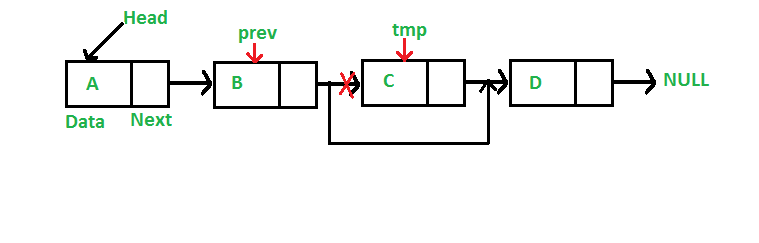

Delete nth node from end of list (for submission)

17 / 67

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def removeNthFromEnd(self, head, n):
        """
        :type head: ListNode
        :type n: int
        :rtype: ListNode
        """

        # if n != 1, compute the depth of the linked list
        temp = head
        depth = 0
        while temp != None:
          temp = temp.next
          depth += 1



        n = depth - n + 1 # n is refreshed to n'


        # if n' is 1
        if n == 1:
          head = head.next
          return head

        # if n' == depth


        # delete n'th node from beginning
        temp = head

        ## case 1 : head is the target node (to be deleted)
        if n == 1:
          head = head.next

        ## case 2 : go deeper over the start node
        while temp != None:
          prev = temp
          temp = temp.next
          n -= 1
          if n == 1:
            break

        prev.next = temp.next
        temp = None

        return head


Delete the node whose data is equal to 'n' (for practice) 

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution(object):
    def removeNthFromEnd(self, head, n):
        """
        :type head: ListNode
        :type n: int
        :rtype: ListNode
        """

        temp = head

        # case 1 : head is the target node (to be deleted)
        if temp.val == n:
          head = head.next

        # case 2 : have to traverse forward to find the target node
        # we should priorly find the previous node of the target node
        while temp != None:
          if temp.val == n:
            break
          prev = temp
          temp = temp.next

        if temp == None:
          return

        prev.next = temp.next
        temp = None

        return head


# 46.Permutations

In [ ]:
nums = [1, 5, 7, 8, 10]

In [ ]:
class Solution(object):
    def permute(self, nums):
      ret = []
      self.DFS(nums, len(nums), [], ret)
      return ret
  
    def DFS(self, nums, numlen, permutation, ret):

      if len(permutation) == numlen:
        ret.append(permutation)
        return # The function does reaches this line but is not terminated
      
      for idx in range(len(nums)):
        
        ReducedNums = nums
        permutation += [ReducedNums.pop(idx)]
        self.DFS(ReducedNums, numlen, permutation, ret)
      

In [ ]:
ans = Solution().permute(nums)
print(ans)

IndexError: ignored

# 77.Combinations (Done / Cheated a lot)

Return nCk

[Leetcode Solution](https://leetcode.com/problems/combinations/discuss/27024/1-liner-3-liner-4-liner)

1. Recursive

In [ ]:
class Solution:
    def combine(self, n, k):
        if k == 0:
            return [[]]
        return [pre + [i] for i in range(k, n+1) for pre in self.combine(i-1, k-1)]

In [ ]:
ans = Solution().combine(5, 2)
print(ans)

[[1, 2], [1, 3], [2, 3], [1, 4], [2, 4], [3, 4], [1, 5], [2, 5], [3, 5], [4, 5]]


2. Iterative

In [ ]:
class Solution:
    def combine(self, n, k):
        combs = [[]]
        for _ in range(k):
            combs = [[i] + c for c in combs for i in range(1, c[0] if c else n+1)]
        return combs

In [ ]:
ans = Solution().combine(5, 2)
print(ans)

[[1, 2], [1, 3], [2, 3], [1, 4], [2, 4], [3, 4], [1, 5], [2, 5], [3, 5], [4, 5]]


3. Reduce

In [ ]:
from functools import reduce

class Solution:
  def combine(self, n, k):
    return reduce(lambda C, _: [[i]+c for c in C for i in range(1, c[0] if c else n+1)],
                  range(k), [[]])

In [ ]:
ans = Solution().combine(5, 2)
print(ans)

[[1, 2], [1, 3], [2, 3], [1, 4], [2, 4], [3, 4], [1, 5], [2, 5], [3, 5], [4, 5]]


4.[ DFS Solution](https://leetcode.com/problems/combinations/discuss/26990/Python-easy-to-understand-DFS-solution) - similar with my original ideaa

In [ ]:
class Solution(object):
    def combine(self, n, k):
        ret = []
        self.dfs(list(range(1, n+1)), k, [], ret)
        return ret
    
    def dfs(self, nums, k, path, ret):
        if len(path) == k:
            ret.append(path)
            return 
        for i in range(len(nums)):
            self.dfs(nums[i+1:], k, path+[nums[i]], ret)

In [ ]:
ans = Solution().combine(5, 2)
print(ans)

[[1, 2], [1, 3], [1, 4], [1, 5], [2, 3], [2, 4], [2, 5], [3, 4], [3, 5], [4, 5]]


# 198.House Robber

In [ ]:
class Solution(object):
    def rob(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        

# 200.Number of Islands (Done / Bad Score)

- Define i, j
- Put i, j's values in the format of (i, j) in Stack
- Unpack i, j = Stack[0]

In [ ]:
import sys
sys.setrecursionlimit(50)

In [ ]:

'''Input = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]'''

'''Input = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]'''

Input = [
  ["1", "0", "1"]
]

'''Input = [
  ["0"]
]'''

'''Input = [
  ["1"]
]'''


'''Input = [
  ["1"]
  ["0"]
  ["1"]
]'''


def Loop(Graph):

  Loop.m, Loop.n = len(Graph), len(Graph[0])
  Loop.visited = [[False for i in range(Loop.n)] for j in range(Loop.m)]
  Loop.myStack = []
  Loop.islandCnt = 0
  


  for i in range(Loop.m):
  
    for j in range(Loop.n): # start from (0, 0), end at (m-1, n-1)

      if (Graph[i][j] == "1") and (Loop.visited[i][j] == False): # DFS only when the current space is a part of an island and an unvisited one
        Loop.islandCnt += 1 # increment the number of islands
        DFS(i, j)
  
  return Loop.islandCnt





def DFS(i, j): # for marking the explored land as "visited"
  
  shift = 0 # to be aware of whether possible adjacent land exists or not
  Loop.visited[i][j] = True
  Loop.myStack.append( (i, j) )
  

  adjacent = [(i, j-1), (i, j+1), (i-1, j), (i+1, j)] # 4 directions check : in order of - left, right, up, down
  for ele in adjacent: # if the land that 1) doesn't exceed index boundary 2) is land 3) is unvisited => shift
  
    if (0 <= ele[0] <= Loop.m - 1) and (0 <= ele[1] <= Loop.n - 1) and (Loop.visited[ele[0]][ele[1]] == False) and (grid[ele[0]][ele[1]] == '1'):

        shift = 1
        DFS(ele[0], ele[1])


   # if the land to go does not exist => pop the stack and trace back
  if shift == 0:

    Recent = Loop.myStack.pop()
    if len(Loop.myStack) == 0: # if no more land to go has left => terminate the recursion
      None

    else:
      Loop.myStack.pop()
      DFS(Recent[0], Recent[1])
 


output = Loop(Input)
output


      

1

Leetcode best solution

In [ ]:
def numIslands(self, grid):
    if not grid:
        return 0
        
    count = 0
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == '1':
                self.dfs(grid, i, j)
                count += 1
    return count

def dfs(self, grid, i, j):
    if i<0 or j<0 or i>=len(grid) or j>=len(grid[0]) or grid[i][j] != '1':
        return
    grid[i][j] = '#'
    self.dfs(grid, i+1, j)
    self.dfs(grid, i-1, j)
    self.dfs(grid, i, j+1)
    self.dfs(grid, i, j-1)

## For submission (using class)

In [ ]:
class Solution(object):

    


    def Loop(self, Graph):
      
      self.map = Graph
      self.m, self.n = len(Graph), len(Graph[0])
      self.visited = [[False for i in range(self.n)] for j in range(self.m)]
      self.myStack = []
      self.islandCnt = 0
      


      for i in range(self.m):
      
        for j in range(self.n): # start from (0, 0), end at (m-1, n-1)

          if (Graph[i][j] == "1") and (self.visited[i][j] == False): # DFS only when the current space is a part of an island and an unvisited one
            self.islandCnt += 1 # increment the number of islands
            self.DFS(i, j)
            #print(f"islandCnt is {self.islandCnt}")
      
     
        
    def DFS(self, i, j): # for marking the explored land as "visited"
  
      self.shift = 0 # to be aware of whether possible adjacent land exists or not
      self.visited[i][j] = True
      self.myStack.append( (i, j) )
      
      #print(f"visited map : {self.visited}")
      self.adjacent = [(i, j-1), (i, j+1), (i-1, j), (i+1, j)] # 4 directions check : in order of - left, right, up, down
      for ele in self.adjacent: # if the land that 1) doesn't exceed index boundary 2) is land 3) is unvisited => shift
      
        if (0 <= ele[0] <= self.m - 1) and (0 <= ele[1] <= self.n - 1) and (self.visited[ele[0]][ele[1]] == False) and (self.map[ele[0]][ele[1]] == '1'):

            self.shift = 1
            self.DFS(ele[0], ele[1])

       
      # if the land to go does not exist => pop the stack and trace back
      #print(f"mystack : {self.myStack}, shift : {self.shift}")
      if self.shift == 0:



        if len(self.myStack) == 0:
          None
        else:
          self.Recent = self.myStack.pop()

          if len(self.myStack) != 0:
            self.myStack.pop()
            self.DFS(self.Recent[0], self.Recent[1])
          else:
            None

          
        


    def numIslands(self, grid):
      self.Loop(grid)
      return self.islandCnt


In [ ]:
grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

a = Solution()
a.numIslands(grid)

islandCnt is 1


1

In [ ]:
def Loop(Graph):

  Loop.m, Loop.n = len(Graph), len(Graph[0])
  Loop.visited = [[False for i in range(Loop.n)] for j in range(Loop.m)]
  Loop.myStack = []
  Loop.islandCnt = 0
  


  for i in range(Loop.m):
  
    for j in range(Loop.n): # start from (0, 0), end at (m-1, n-1)

      if (Graph[i][j] == "1") and (Loop.visited[i][j] == False): # DFS only when the current space is a part of an island and an unvisited one
        Loop.islandCnt += 1 # increment the number of islands
        DFS(i, j)
  
  return Loop.islandCnt





def DFS(i, j): # for marking the explored land as "visited"
  
  shift = 0 # to be aware of whether possible adjacent land exists or not
  Loop.visited[i][j] = True
  Loop.myStack.append( (i, j) )
  

  adjacent = [(i, j-1), (i, j+1), (i-1, j), (i+1, j)] # 4 directions check : in order of - left, right, up, down
  for ele in adjacent: # if the land that 1) doesn't exceed index boundary 2) is land 3) is unvisited => shift
  
    if (0 <= ele[0] <= Loop.m - 1) and (0 <= ele[1] <= Loop.n - 1) and (Loop.visited[ele[0]][ele[1]] == False) and (grid[ele[0]][ele[1]] == '1'):

        shift = 1
        DFS(ele[0], ele[1])


   # if the land to go does not exist => pop the stack and trace back
  if shift == 0:

    Recent = Loop.myStack.pop()
    if len(Loop.myStack) == 0: # if no more land to go has left => terminate the recursion
      None

    else:
      Loop.myStack.pop()
      DFS(Recent[0], Recent[1])
 


output = Loop(Input)
output

1

# 167.Two Sum II - Input Array Is Sorted

https://leetcode.com/problems/two-sum-ii-input-array-is-sorted/discuss/51249/Python-different-solutions-(two-pointer-dictionary-binary-search).

11 / 12

In [ ]:
numbers = [2,7,11,15]
target = 9

In [ ]:
class Solution:
    def twoSum(self, numbers, target):
        hashmap = {}
        for i in range(len(numbers)):
            hashmap[numbers[i]] = i
        for i in range(len(numbers)):
            complement = target - numbers[i]
            if complement in hashmap and hashmap[complement] != i:
                return [i + 1, hashmap[complement] + 1] 

a = Solution()
print( a.twoSum( numbers , target) )

[1, 2]


reset the range of the given array (not using hash table) / time exceeded

In [ ]:
numbers = [-1,0]
target = -1

In [ ]:
class Solution:
    def binary_search(self, arr, x):
        low = 0
        high = len(arr) - 1
        mid = 0
    
        while low <= high:
    
            mid = (high + low) // 2
    
            # If x is greater, ignore left half
            if arr[mid] < x:
                low = mid + 1
    
            # If x is smaller, ignore right half
            elif arr[mid] > x:
                high = mid - 1
    
            # means x is present at mid
            else:
                return mid
    
        # If we reach here, then the element was not present
        return -1

    def twoSum(self, numbers, target):
        
        for idx in range(len(numbers)):
          complement = target - numbers[idx]
          bs = self.binary_search(numbers[idx + 1:], complement)
          if (-1) != bs: # if we searched 
            return [idx + 1 ,(idx + bs + 1) + 1]

        
############## exclude this code ########################
a = Solution()
print( a.twoSum( numbers , target) )

[1, 2]


#695.Max Area of Island (Done, By myself)

93 / 70

In [ ]:
class Solution(object):
    def maxAreaOfIsland(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        
        self.grid = grid
        self.m = len(grid)
        self.n = len(grid[0])

        maxArea = 0
        self.area = 0

        for row in range(self.m):
          for col in range(self.n):
            if self.grid[row][col] == 1:
              self.DFS(row, col)

              if maxArea > self.area :
                self.area = 0
              else :
                maxArea = self.area
                self.area = 0

        return maxArea

    def DFS(self, i, j):
        if i < 0 or j < 0 or i > self.m - 1 or j > self.n - 1 or self.grid[i][j] != 1 : # if the indices exceed the boundary or current location is not unvisited land
          return

        self.grid[i][j] = '#'
        self.area += 1
      
        self.DFS(i - 1, j)
        self.DFS(i + 1, j)
        self.DFS(i, j - 1)
        self.DFS(i, j + 1)
        

In [ ]:
grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]

ans = Solution().maxAreaOfIsland(grid)
print(ans)

6


#542.01 Matrix

Leetcode Submission

In [ ]:
class Solution(object):

        
    def updateMatrix(self, mat):
        """
        :type mat: List[List[int]]
        :rtype: List[List[int]]
        """
        self.mat = mat
        self.visited = [['X' for i in range(len(mat[0]))] for j in range(len(mat))]
        self.myQ = []
        self.distance = 0
        
        
        for i in range(len(mat)):
          for j in range(len(mat[0])):
            if mat[i][j] == 1: # if the cell value is 1
              
              #print(f"<BFS start point : {i}, {j}>")
              
              self.mat[i][j] = self.BFS(i, j)
              self.visited = [['X' for i in range(len(mat[0]))] for j in range(len(mat))] # reset the visited map
              self.myQ = [] # reset the myQ
              self.distance = 0

        return self.mat
        
    def BFS(self, i, j):
        self.myQ.append( (i, j) )
        self.visited[i][j] = 0
        
        while True:
          self.distance += 1
          #print(f"myQ is now {self.myQ}")
            
          i, j = self.myQ.pop(0)

          for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
            if x >= 0 and y >= 0 and x < len(self.mat) and y < len(self.mat[0]) and self.visited[x][y] == 'X':
              
              if self.mat[x][y] == 0: # if we reach the cell whose value is 0
                #print(f"!!! Early Stopped because we reach 0 whose index is {x}, {y}")

                return self.distance # while loop will be terminated someday cuz the matrix has at least one zero

              else:
                self.myQ.append( (x, y) )
                self.visited[x][y] = self.distance
        

In [ ]:
mat = [[0,1,0,1,1],[1,1,0,0,1],[0,0,0,1,0],[1,0,1,1,1],[1,0,0,0,1]]
ans = Solution().updateMatrix(mat)
print(ans)

[[0, 1, 0, 1, 2], [1, 1, 0, 0, 1], [0, 0, 0, 1, 0], [1, 0, 1, 1, 1], [1, 0, 0, 0, 1]]


Simple function using ver.

In [ ]:
mat = [[0]]


visited = [['X' for i in range(len(mat[0]))] for j in range(len(mat))]
myQ = []

def BFS(i, j):
    myQ.append( (i, j) )
    visited[i][j] = 0
    distance = 0
    
    while True:
      distance += 1
      print(f"myQ is now {myQ}")
        
      i, j = myQ.pop(0)

      for x, y in [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]:
        if x >= 0 and y >= 0 and x < len(mat) and y < len(mat[0]) and visited[x][y] == 'X':
          
          if mat[x][y] == 0: # if we reach the cell whose value is 0
            print(f"!!! Early Stopped because we reach 0 whose index is {x}, {y}")

            return distance # while loop will be terminated someday cuz the matrix has at least one zero

          else:
            myQ.append( (x, y) )
            visited[x][y] = distance



for i in range(len(mat)):
  for j in range(len(mat[0])):
    if mat[i][j] == 1: # if the cell value is 1
      
      print(f"<BFS start point : {i}, {j}>")
      
      mat[i][j] = BFS(i, j)
      visited = [['X' for i in range(len(mat[0]))] for j in range(len(mat))] # reset the visited map

print(mat)



  

[[0]]


In [ ]:
z = [(1, 2), (3, 5), (6, 10)]

In [ ]:
p = z.pop(0)

In [ ]:
z.append(4)

In [ ]:
p = z.pop(0)

In [ ]:
p

(3, 5)

# 931.Minimum Falling Path Sum

Try to program in dynamic way (allocate the minimum storage)

In [ ]:
class Solution(object):
    def minFallingPathSum(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """

        strorage = 0

        

# 994.Rotting Oranges

In [ ]:
grid = [[2,1,1],[1,1,0],[0,1,1]]
def Outer(grid):
  rotten_Os = []
  for i in range(len(grid)):
    for j in range(len(grid)):
      if grid[i][j] == 2:
        rotten_Os.append([i, j])


  # Assume that rotten_Os becomes [ [0, 0] , [2, 3] ]
  BFS(rotten_Os)
        

SyntaxError: ignored

In [ ]:
def BFS(rotten_Os):
  queue = rotten_Os
  while queue: # we have any way to go
    
    i, j = queue.pop(0)
    
    next_points = [ [i - 1, j], [i + 1, j], [i, j - 1], [i, j + 1] ]
    for x, y in next_points:
      if x >= 0 and y > and .. and grid[x][y] == 1 : # Only go to a fresh orange
        
        grid[x][y] = 2 # To be rotten
        queue.append([x, y])
      

  # finally check whether all the oranges are rotten